# Problem Statement:-
### MNIST Handwritten Character Detection using PyTorch, Keras and Tensorflow .


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist

In [2]:
#loading MNIST dataset


In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 10s 1us/step


In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

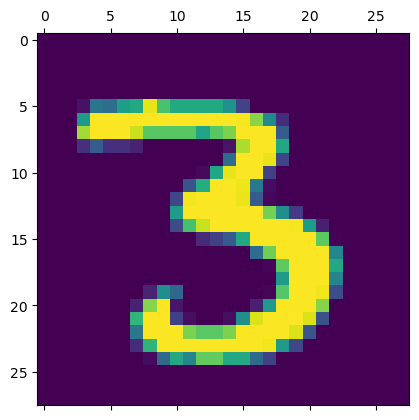

In [8]:
plt.matshow(x_train[12])

In [9]:
x_train_flat = tf.keras.utils.normalize(x_train , axis = 1)
x_test_flat = tf.keras.utils.normalize(x_test , axis = 1)

In [10]:
x_train_flat[12]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

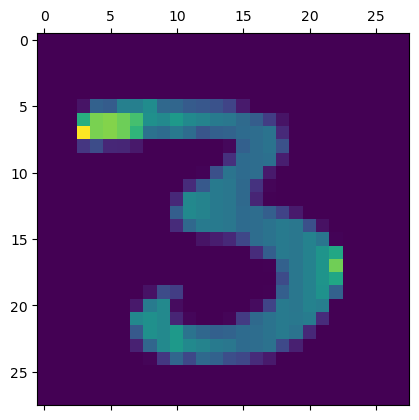

In [11]:
plt.matshow(x_train_flat[12])

In [12]:
#BUILDING neural network 

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3362 - accuracy: 0.9071
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1598 - accuracy: 0.9527
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1107 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0838 - accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9805


In [14]:
#Calculating the LOSS and ACCURACY for TRAINING DATA

In [15]:
val_loss , val_accur = model.evaluate(x_test_flat , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9730


In [16]:
# Now testing or PREDICTING the IMAGES using PREDICT function

In [17]:
y_predicted = model.predict(x_test_flat)

313/313 [==============================] - 1s 2ms/step


In [18]:
y_predicted[100]  #Printing first 100 VALUES

array([2.7085591e-05, 1.6203364e-06, 5.4994165e-05, 5.7170109e-07,
       4.6680580e-06, 1.2436957e-06, 9.9990880e-01, 1.1296661e-07,
       9.4607435e-07, 1.1977340e-08], dtype=float32)

In [19]:
#Now its time to PREDICTING THE IMAGES ON THE BASIS OF TEST DATA

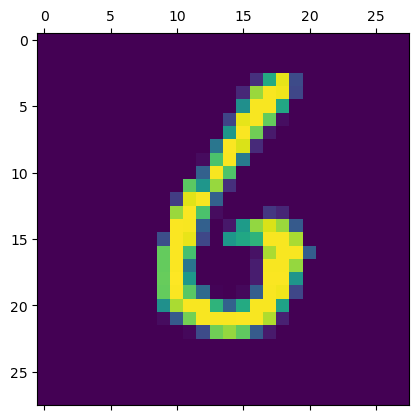

In [20]:
#Firstly check which image we are going to predict
plt.matshow(x_test[50])

In [21]:
np.argmax(y_predicted[50])

6

In [22]:
#  Drowing the confusion matrix

from tensorflow.math import confusion_matrix

In [23]:
y_predict_labels = [np.argmax(i) for i in y_predicted]
print(y_predict_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 7, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
conf_matr = confusion_matrix(y_test , y_predict_labels)

In [25]:
conf_matr

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    0,    0,    1,    4,    1,    2,    0],
       [   0, 1122,    6,    0,    0,    0,    2,    0,    5,    0],
       [   5,    2, 1009,    2,    2,    0,    3,    5,    4,    0],
       [   0,    0,    9,  976,    0,    4,    2,    9,    7,    3],
       [   1,    0,    6,    1,  959,    0,    4,    2,    3,    6],
       [   3,    0,    2,   15,    0,  853,    7,    2,    8,    2],
       [   6,    2,    1,    1,    3,    2,  940,    0,    3,    0],
       [   3,    3,   12,    3,    0,    0,    0, 1005,    0,    2],
       [   5,    3,    3,    7,    4,    2,    4,    5,  936,    5],
       [   7,    5,    0,    7,   13,    6,    1,    7,    4,  959]])>